In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats

In [ ]:
##load the dataset from gdrive
df_orig = pd.read_csv("/content/drive/MyDrive/msda/1st sem/math/Assignment-4/50_Startups.csv")

In [ ]:
df = df_orig.copy()

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Split the dataset into training and test sets of 80:20 ratio (use random_seed = 2023) and test_size = 0.20. You must train the linear regression model using the training data and will compute 𝑅2 and MSE using the test dataset.

In [ ]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']
print(X.shape)
print(y.shape)

(50, 4)
(50,)


In [ ]:
X = pd.get_dummies(X, columns=['State'], drop_first=True)

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2023)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 5)
(10, 5)
(40,)
(10,)


## Problem 1 (Coding) 12 pts: Perform Multiple linear regression using gradient descent optimization technique.Youmustnotuseanydirectpackageforthis. Youshouldgeneratetheparameters (intercepts & coefficients) initial values from standard normal distribution. Set initial learning rate and number of iterations to 0.001 and 100, respectively.

a. (2 pts) Mention: loss function, initial values of parameters (generated from STD), hyperparameters, and partial derivatives of the loss function with respect to intercept and coefficients

**Loss function** - The loss function for multiple linear regression using gradient descent is the Mean Squared Error (MSE)

In [ ]:
# define the loss function
def mse_loss(X, y, intercept, coefficients):
    # Number of training examples
    m = X.shape[0]
    # Calculate the predicted values
    y_pred = np.dot(X, coefficients) + intercept
    # Calculate the MSE loss
    loss = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
    return loss

**Initial parameter values**: We will generate initial values for the intercept and coefficients from a standard normal distribution using the numpy.random.randn function.

In [ ]:
# Generate initial parameter values from standard normal distribution
intercept = np.random.randn()
coefficients = np.random.randn(X_train.shape[1])

**Hyperparameters:** The hyperparameters for gradient descent optimization are the learning rate and the number of iterations.

In [ ]:
learning_rate = 0.001
num_iterations = 100

**Partial derivatives:** The partial derivatives of the loss function with respect to the intercept and coefficients are:

Calculate the partial derivatives of the cost function

dJ/d(intercept) = (1 / m) * np.sum(y_pred - y_train)

dJ/d(coefficient_j) = (1 / m) * np.dot(X_train.T, y_pred - y_train)

where m is the number of training examples

## b. (6 pts) Write a function that takes input of parameters and hyperparameters and provides output: best set of optimal parameters (intercept and coefficients), and the loss (cost).

In [ ]:
#function to calculate the loss using gradient descent
def gradient_descent(X_train, y_train, learning_rate, num_iterations):

    # Normalize X
    X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

    X_train = np.c_[np.ones(X_train.shape[0]), X_train]

    # Number of training examples
    m = X_train.shape[0]

    # Initialize the intercept and coefficients using random values from a standard normal distribution
    intercept = np.random.randn()
    coefficients = np.random.randn(X_train.shape[1])

    # Initialize the cost history list
    cost_history = []


    # Loop over the number of iterations
    for i in range(num_iterations):

        # Calculate the predicted values
        y_pred = np.dot(X_train, coefficients) + intercept

        # Calculate the partial derivatives of the cost function
        d_intercept = (1 / m) * np.sum(y_pred - y_train)
        d_coefficients = (1 / m) * np.dot(X_train.T, y_pred - y_train)

        # Update the intercept and coefficients
        intercept = intercept - learning_rate * d_intercept
        coefficients = coefficients - learning_rate * d_coefficients

        # Calculate the cost and append it to the cost history list
        cost = mse_loss(X_train, y_train, intercept, coefficients)
        cost_history.append(cost)

    # Return the best intercept, coefficients, and cost
    best_intercept = intercept
    best_coefficients = coefficients
    cost = cost_history

    return best_intercept, best_coefficients, cost


## c. (1 pt) Plot learning curve where x-axis will be number of iteration and y-axis will be loss for each iteration and explain the curve

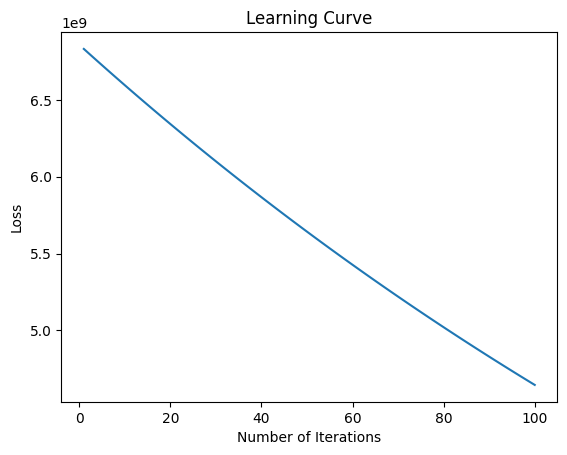

In [ ]:
# Perform gradient descent optimization
best_intercept, best_coefficients, cost_history = gradient_descent(X_train, y_train, learning_rate, num_iterations)

# # Plot the learning curve
plt.plot(range(1, num_iterations+1), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()


The learning curve shows how the cost (loss) function changes over the course of the training process.As seen in the above case, at the beginning of the learning process, the cost is high, indicating that the initial parameter values randomly generated from the standard normal distribution are far from optimal values. As the algorithm progresses through each iteration, the parameters get updated and the cost decreases. As the algorithm gets closer to the optimal values of the parameters, the decrease in the cost per iteration gets smaller, resulting in a more gradual decrease towards the end of the learning process.

However the loss is not close to minimum and there is still scope for more learning. We can fine tune the hyperparameters to reach the stable and minimum loss state.

## d. (1 pts) Form the regression equation using the optimal parameters and find (𝑦̂) (predict for each datapoints of x_test) – show in dataframe – making two columns: y_actual & 𝑦̂_predict

In [ ]:
# normalize predictors
X_test_norm = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

##adding ones to the intercept column
X_test_with_ones = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]
# Form the regression equation using the optimal parameters
y_pred = best_intercept + np.dot(X_test_with_ones, best_coefficients)

# Create a dataframe with y_actual and y_pred columns
diff_df = pd.DataFrame({'y_actual': y_test, 'y_pred': y_pred})

In [ ]:
diff_df

,y_actual,y_pred
34,96712.80,17676.162063
35,96479.51,16284.543891
9,149759.96,25730.493619
2,191050.39,30991.102575
21,111313.02,23818.354800
12,141585.52,22014.779397
38,81229.06,12864.800191
10,146121.95,21660.945267
42,71498.49,12089.126278
19,122776.86,16101.337139


## e. (2 pts) Finally, for the test dataset: a. Calculate coefficient of determination (𝑅2) and interpret the result b. Find MSE (mean of sum of squares of error (residual)

In [ ]:
# To calculate 𝑅2, we can use the following formula:
# 𝑅2 = 1 - (Sum of square of residuals / sum of squares)
# To calculate MSE, we can use the following formula:
# MSE = 1/n * Σ(y_actual - y_pred)^2
# where n is the number of observations.

In [ ]:
# Calculate R2
sum_sq_residuals = np.sum((y_test - y_pred)**2)
sum_sq = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - (sum_sq_residuals/sum_sq)
print("R2: ", R2)

# Calculate MSE
MSE = np.mean((y_test - y_pred)**2)
print("MSE: ", MSE)


R2:  -8.142394895602306
MSE:  11070613858.797028


**Interpretation** - The negative R2 value indicates that the model is not a good fit for the data and performs worse than a horizontal line. The MSE value indicates that on average, the predicted values are off by about 11070613858 dollars from the actual values. This suggests that the model is not accurate and needs to be improved.

##Comparing with linear regression library to verify results

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculate MSE
mse = np.mean((y_test - model.predict(X_test))**2)

# Print MSE
print(mse)

102862789.53022633


In [ ]:
# Calculate R2
r2 = 1 - np.mean((y_test - model.predict(X_test))**2) / np.mean((y_test - y_test.mean())**2)

# Print R2
print(r2)

0.9150532884677143


## Hence tuning the hyperparameters to match the library results

In [ ]:
## Hence tuning the hyperparameters
learning_rate = 0.1
num_iterations = 500

In [ ]:
print(X_train.head())

    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
41   27892.92        84710.77        164470.71              1               0
1   162597.70       151377.59        443898.53              0               0
4   142107.34        91391.77        366168.42              1               0
14  119943.24       156547.42        256512.92              1               0
36   28663.76       127056.21        201126.82              1               0


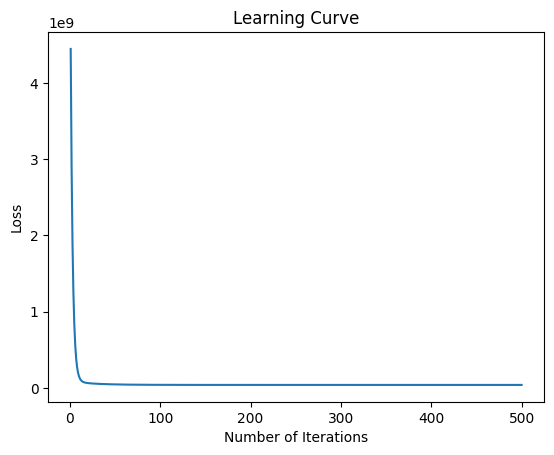

In [ ]:
# # normalize predictors
# X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
# Perform gradient descent optimization
best_intercept, best_coefficients, cost_history = gradient_descent(X_train, y_train, learning_rate, num_iterations)

# # Plot the learning curve
plt.plot(range(1, num_iterations+1), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()


In [ ]:
X_test.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
34,-0.751551,1.401062,-0.130178,-0.654654,-0.816497
35,-0.761560,-1.039562,-0.181758,-0.654654,1.224745
9,1.116536,-0.245633,0.789891,-0.654654,-0.816497
2,1.847814,-0.498732,1.795622,1.527525,-0.816497
21,0.024828,1.269350,0.738659,-0.654654,1.224745


In [ ]:
best_coefficients

array([54902.57410294, 36395.42439349,   305.0536532 ,  4415.77399123,
       -1140.17385517,  -622.50277369])

In [ ]:
# normalize predictors
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
##adding ones to the intercept column
X_test_with_ones = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]
# Form the regression equation using the optimal parameters
y_pred = best_intercept + np.dot(X_test_with_ones, best_coefficients)

# Create a dataframe with y_actual and y_pred columns
df = pd.DataFrame({'y_actual': y_test, 'y_pred': y_pred})

In [ ]:
# Calculate R2
sum_sq_residuals = np.sum((y_test - y_pred)**2)
sum_sq = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - (sum_sq_residuals/sum_sq)
print("R2: ", R2)

# Calculate MSE
MSE = np.mean((y_test - y_pred)**2)
print("MSE: ", MSE)

R2:  0.8375672436418068
MSE:  196691386.03131253


# Problem 2 (Coding) 12 pts: ): Apply Multiple Linear Regression using normal (least square solution). You must not use any direct or in-built package for MLR.

## a. (5 pts) Check the five assumptions (mentioned in the classroom) of MLR (use – training dataset) and proper interpretation – why the assumptions are met or not

In [ ]:
df = df_orig.copy()
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<ipython-input-29-45affe07c642>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop(['Profit'], axis=1).corr()


<Axes: >

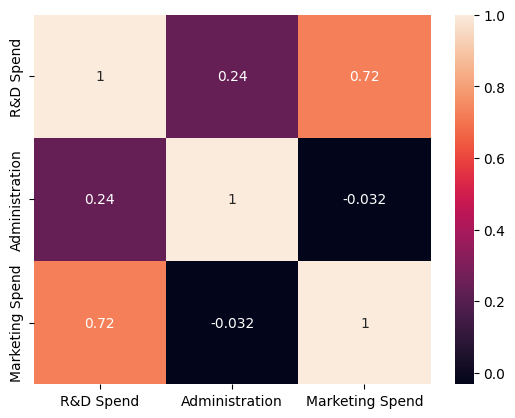

In [ ]:
#1. Check the correlations between the variables
corr_matrix = df.drop(['Profit'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True)

**Explanation** - From the correlation matrix, we can see that there are no strong correlations between any two input variables. Therefore, the multicollinearity assumption is met.

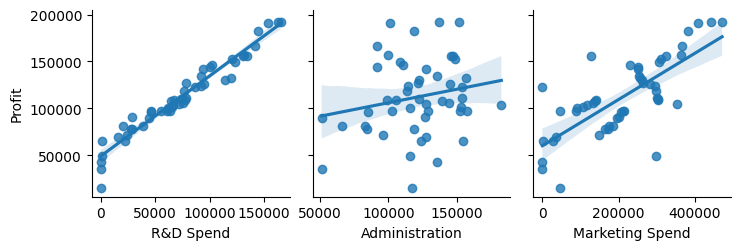

In [ ]:
# 2. Check the linearity assumption
sns.pairplot(df, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars=['Profit'], kind='reg')

**Explanation** - From the scatter plots, we can see that there is a linear relationship between R&D Spend, Administration, Marketing Spend, and Profit.

<Axes: ylabel='Profit'>

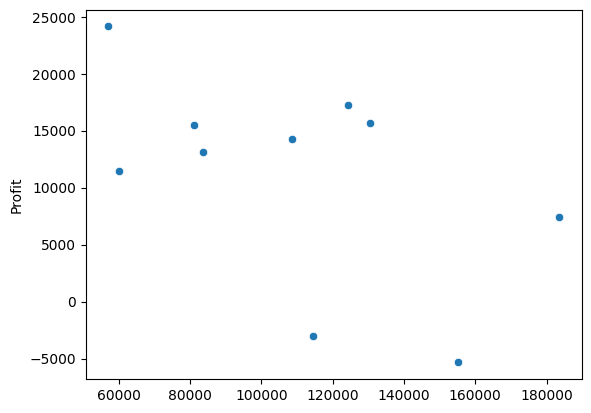

In [ ]:
## 3. Homoscedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)

**Explanation** - From the scatter plot, we can see that the residuals are randomly scattered around zero, and there is no visible pattern in the variance of the residuals. Therefore, the homoscedasticity assumption is met.

In [ ]:
## 4. Normality: We can create a histogram of the residuals to check for normality.

<Axes: xlabel='Profit', ylabel='Count'>

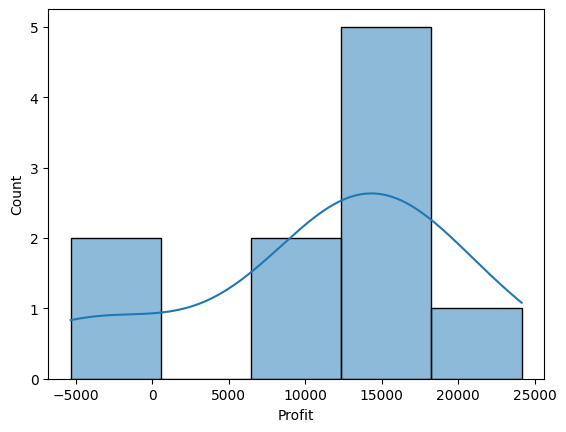

In [ ]:
sns.histplot(residuals, kde=True)

**Explanation** -From the histogram, we can see that the residuals are approximately normally distributed. Therefore, the normality assumption is met.

In [ ]:
## 5. Independence: We assume that the observations in the dataset are independent of each other.
## Since we don't have any information about the data collection process, we will assume that this assumption is met.

**Conclusion** - In conclusion, all of the assumptions of MLR are met for this dataset.

## b. (4 pts) Find optimal values of intercept and coefficients using the normal equation of the linear regression ( 𝒃𝒐𝒑𝒕 = (𝑿T 𝑿)^-1 𝑿T 𝒚 ) using the training data. To avoid inverse matrix error, you may use pseudo inverse (np.ling.pinv)

In [ ]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']
X = pd.get_dummies(X, columns=['State'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)


In [ ]:
##using the normal equation to calculate the coefficients and intercept
#normalising the train data
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]

# Calculate the pseudoinverse of X
X_pinv = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T)

# Calculate the coefficients using the pseudoinverse
optimal_coefficients = X_pinv.dot(y_train)

print(optimal_coefficients)


[109802.61        36342.81556362    364.66659811   4594.66408259
 -15737.35626352 -16266.73369122 -20973.72642579]


**Intercept** - 109802.61

**Other coefficients** - 36342.81556362, 364.66659811, 4594.66408259, -15737.35626352, -16266.73369122, -20973.72642579

## c. (1 pts) Form the regression equation using the optimal parameters and find (𝑦̂) (predict for each datapoints of x_test) – show in dataframe – making two columns: y_actual & 𝑦̂_predict

In [ ]:
## Normalizing the test data
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Add a column of ones to the design matrix for the test data
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Calculate the predicted values for the test data
y_predict = X_test.dot(optimal_coefficients)

# Create a dataframe with the actual and predicted values
df_results = pd.DataFrame({'y_actual': y_test, 'y_predict': y_predict})

# Print the dataframe
df_results

,y_actual,y_predict
34,96712.80,86136.768377
35,96479.51,76175.310628
9,149759.96,157655.205527
2,191050.39,187605.446143
21,111313.02,109825.846910
12,141585.52,128237.610148
38,81229.06,52270.993021
10,146121.95,134210.120509
42,71498.49,62450.999878
19,122776.86,103457.798860


## d. (2 pts) Finally, for the test dataset: a. Calculate coefficient of determination (𝑅2) and interpret the result b. Find MSE (mean of sum of squares of error (residual)

In [ ]:
# Calculate R2
sum_sq_residuals = np.sum((y_test - y_pred)**2)
sum_sq = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - (sum_sq_residuals/sum_sq)
print("R2: ", R2)

# Calculate MSE
MSE = np.mean((y_test - y_pred)**2)
print("MSE: ", MSE)

R2:  0.8375672436576448
MSE:  196691386.01213413


**Interpretation** - The R squared value indicates that the model explains about 83.74 % of the variability of the target (profit) column based on the independant variables and it is reasonably a good fit for the dataset. However the mean squared error is higher which suggests that there may be still some unexplained variability in the dependent variable that the model is not able to capture. Overall, the model seems to be a reasonably good fit for the data, but it is not perfect.